In [1]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
import numpy
import numpy as np
import csv
import sklearn
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import SGD
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras import optimizers
from keras import backend as K
import random
import h5py
import scipy.io as sio
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
dataset=csv.reader(open('train.csv','r'))

#print dataset
X_train= np.zeros((2000,14))
Y_train= np.zeros((2000,1))
j=0
for data in dataset:
   if j>=1: 
    temp= data[1]
    #print (temp)
    Y_train[j-1]=data[2]
    i=0
    for element in temp:
        #print (element)
        if element=='A':
            X_train[j-1][i]=-1
            i=i+1
        if element=='C':
            X_train[j-1][i]=-0.5
            i=i+1
        if element=='G':
            X_train[j-1][i]=0.5
            i=i+1
        if element=='T':
            X_train[j-1][i]=1
            i=i+1
   j=j+1        
index=np.arange(len(X_train))
np.random.shuffle(index)
X_train=X_train[index,:]
Y_train=Y_train[index]
datadict = {'X': X_train,'Y':Y_train}
sio.savemat('X_Y.mat',datadict)
#sio.savemat('Y.mat',Y_train)
#dataset = numpy.loadtxt("train.csv", delimiter=",")
# reshape to be [samples][pixels][width][height]
#rmsprop=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
#sgd = SGD(lr=0.15, decay=1e-6, momentum=0, nesterov=True)
optm=keras.optimizers.Adam(lr=0.0002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

/home/heng/tfcpu/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/heng/tfcpu/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def SimpleMLP_model():
	# create model
    model = Sequential()
    model.add(Dense(32, input_dim=14, init='normal'))
    model.add(Activation('relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(16, init='normal')) 
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optm, metrics=['accuracy'])
    return model

model = SimpleMLP_model()
M=1800
history=model.fit(X_train[0:M,:], Y_train[0:M],validation_data=(X_train[M+1:1999,:],  Y_train[M+1:1999]), nb_epoch=500, batch_size=50)
#scores = model.evaluate(X_test, y_test, verbose=0)
#print("Baseline Error: %.2f%%" % (100-scores[1]*100))
#model.save('gene.h5') 

/home/heng/tfcpu/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, kernel_initializer="normal", input_dim=14)`
  after removing the cwd from sys.path.
/home/heng/tfcpu/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, kernel_initializer="normal")`
  import sys
/home/heng/tfcpu/local/lib/python2.7/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1800 samples, validate on 198 samples
Epoch 1/500
1800/1800 [==============================] - 0s 178us/step - loss: 0.6920 - acc: 0.5039 - val_loss: 0.6920 - val_acc: 0.5051
Epoch 2/500
1800/1800 [==============================] - 0s 40us/step - loss: 0.6908 - acc: 0.5144 - val_loss: 0.6917 - val_acc: 0.5000
Epoch 3/500
1800/1800 [==============================] - 0s 36us/step - loss: 0.6899 - acc: 0.5189 - val_loss: 0.6913 - val_acc: 0.5000
Epoch 4/500
1800/1800 [==============================] - 0s 45us/step - loss: 0.6886 - acc: 0.5161 - val_loss: 0.6908 - val_acc: 0.5051
Epoch 5/500
1800/1800 [==============================] - 0s 39us/step - loss: 0.6872 - acc: 0.5311 - val_loss: 0.6900 - val_acc: 0.5152
Epoch 6/500
1800/1800 [==============================] - 0s 40us/step - loss: 0.6857 - acc: 0.5444 - val_loss: 0.6891 - val_acc: 0.5152
Epoch 7/500
1800/1800 [==============================] - 0s 34us/step - loss: 0.6828 - acc: 0.5572 - val_loss: 0.6877 - val_acc: 0.5505


1800/1800 [==============================] - 0s 28us/step - loss: 0.4703 - acc: 0.8083 - val_loss: 0.5433 - val_acc: 0.7121
Epoch 61/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.4681 - acc: 0.8056 - val_loss: 0.5424 - val_acc: 0.7172
Epoch 62/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.4588 - acc: 0.8128 - val_loss: 0.5391 - val_acc: 0.7121
Epoch 63/500
1800/1800 [==============================] - 0s 28us/step - loss: 0.4594 - acc: 0.8078 - val_loss: 0.5366 - val_acc: 0.7172
Epoch 64/500
1800/1800 [==============================] - 0s 27us/step - loss: 0.4572 - acc: 0.8122 - val_loss: 0.5354 - val_acc: 0.7172
Epoch 65/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.4498 - acc: 0.8128 - val_loss: 0.5327 - val_acc: 0.7273
Epoch 66/500
1800/1800 [==============================] - 0s 28us/step - loss: 0.4480 - acc: 0.8167 - val_loss: 0.5307 - val_acc: 0.7374
Epoch 67/500
1800/1800 [==============================

Epoch 120/500
1800/1800 [==============================] - 0s 28us/step - loss: 0.3299 - acc: 0.8683 - val_loss: 0.4737 - val_acc: 0.7879
Epoch 121/500
1800/1800 [==============================] - 0s 28us/step - loss: 0.3357 - acc: 0.8650 - val_loss: 0.4726 - val_acc: 0.7879
Epoch 122/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.3341 - acc: 0.8656 - val_loss: 0.4720 - val_acc: 0.7929
Epoch 123/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.3323 - acc: 0.8622 - val_loss: 0.4710 - val_acc: 0.7879
Epoch 124/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.3320 - acc: 0.8739 - val_loss: 0.4712 - val_acc: 0.7828
Epoch 125/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.3304 - acc: 0.8694 - val_loss: 0.4718 - val_acc: 0.7929
Epoch 126/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.3278 - acc: 0.8689 - val_loss: 0.4701 - val_acc: 0.7929
Epoch 127/500
1800/1800 [=========

1800/1800 [==============================] - 0s 29us/step - loss: 0.2744 - acc: 0.8911 - val_loss: 0.4596 - val_acc: 0.8081
Epoch 180/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.2735 - acc: 0.8978 - val_loss: 0.4585 - val_acc: 0.8131
Epoch 181/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.2680 - acc: 0.8900 - val_loss: 0.4589 - val_acc: 0.8081
Epoch 182/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.2742 - acc: 0.8917 - val_loss: 0.4603 - val_acc: 0.8081
Epoch 183/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.2775 - acc: 0.8861 - val_loss: 0.4577 - val_acc: 0.8131
Epoch 184/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.2710 - acc: 0.8883 - val_loss: 0.4572 - val_acc: 0.8131
Epoch 185/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.2708 - acc: 0.8928 - val_loss: 0.4577 - val_acc: 0.8131
Epoch 186/500
1800/1800 [=======================

1800/1800 [==============================] - 0s 30us/step - loss: 0.2359 - acc: 0.9128 - val_loss: 0.4537 - val_acc: 0.8182
Epoch 239/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.2335 - acc: 0.9028 - val_loss: 0.4550 - val_acc: 0.8182
Epoch 240/500
1800/1800 [==============================] - 0s 30us/step - loss: 0.2339 - acc: 0.9122 - val_loss: 0.4550 - val_acc: 0.8182
Epoch 241/500
1800/1800 [==============================] - 0s 30us/step - loss: 0.2322 - acc: 0.9106 - val_loss: 0.4566 - val_acc: 0.8182
Epoch 242/500
1800/1800 [==============================] - 0s 30us/step - loss: 0.2412 - acc: 0.9089 - val_loss: 0.4552 - val_acc: 0.8182
Epoch 243/500
1800/1800 [==============================] - 0s 30us/step - loss: 0.2343 - acc: 0.9089 - val_loss: 0.4602 - val_acc: 0.8131
Epoch 244/500
1800/1800 [==============================] - 0s 32us/step - loss: 0.2358 - acc: 0.9083 - val_loss: 0.4575 - val_acc: 0.8131
Epoch 245/500
1800/1800 [=======================

1800/1800 [==============================] - 0s 34us/step - loss: 0.2093 - acc: 0.9244 - val_loss: 0.4663 - val_acc: 0.8232
Epoch 298/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.2152 - acc: 0.9189 - val_loss: 0.4691 - val_acc: 0.8182
Epoch 299/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.2137 - acc: 0.9222 - val_loss: 0.4683 - val_acc: 0.8131
Epoch 300/500
1800/1800 [==============================] - 0s 30us/step - loss: 0.2155 - acc: 0.9139 - val_loss: 0.4652 - val_acc: 0.8182
Epoch 301/500
1800/1800 [==============================] - 0s 31us/step - loss: 0.2184 - acc: 0.9106 - val_loss: 0.4673 - val_acc: 0.8232
Epoch 302/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.2102 - acc: 0.9200 - val_loss: 0.4639 - val_acc: 0.8232
Epoch 303/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.2131 - acc: 0.9206 - val_loss: 0.4654 - val_acc: 0.8232
Epoch 304/500
1800/1800 [=======================

1800/1800 [==============================] - 0s 31us/step - loss: 0.1994 - acc: 0.9194 - val_loss: 0.4910 - val_acc: 0.8131
Epoch 357/500
1800/1800 [==============================] - 0s 31us/step - loss: 0.2002 - acc: 0.9233 - val_loss: 0.4902 - val_acc: 0.8232
Epoch 358/500
1800/1800 [==============================] - 0s 30us/step - loss: 0.2007 - acc: 0.9261 - val_loss: 0.4886 - val_acc: 0.8232
Epoch 359/500
1800/1800 [==============================] - 0s 31us/step - loss: 0.2016 - acc: 0.9217 - val_loss: 0.4915 - val_acc: 0.8232
Epoch 360/500
1800/1800 [==============================] - 0s 30us/step - loss: 0.1973 - acc: 0.9267 - val_loss: 0.4895 - val_acc: 0.8283
Epoch 361/500
1800/1800 [==============================] - 0s 28us/step - loss: 0.1986 - acc: 0.9206 - val_loss: 0.4951 - val_acc: 0.8182
Epoch 362/500
1800/1800 [==============================] - 0s 28us/step - loss: 0.1980 - acc: 0.9250 - val_loss: 0.4971 - val_acc: 0.8232
Epoch 363/500
1800/1800 [=======================

1800/1800 [==============================] - 0s 29us/step - loss: 0.1814 - acc: 0.9294 - val_loss: 0.5162 - val_acc: 0.8182
Epoch 416/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.1833 - acc: 0.9283 - val_loss: 0.5175 - val_acc: 0.8182
Epoch 417/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.1850 - acc: 0.9350 - val_loss: 0.5128 - val_acc: 0.8182
Epoch 418/500
1800/1800 [==============================] - 0s 28us/step - loss: 0.1844 - acc: 0.9311 - val_loss: 0.5112 - val_acc: 0.8131
Epoch 419/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.1830 - acc: 0.9317 - val_loss: 0.5147 - val_acc: 0.8131
Epoch 420/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.1833 - acc: 0.9356 - val_loss: 0.5167 - val_acc: 0.8131
Epoch 421/500
1800/1800 [==============================] - 0s 31us/step - loss: 0.1833 - acc: 0.9378 - val_loss: 0.5140 - val_acc: 0.8182
Epoch 422/500
1800/1800 [=======================

1800/1800 [==============================] - 0s 30us/step - loss: 0.1700 - acc: 0.9333 - val_loss: 0.5351 - val_acc: 0.8131
Epoch 475/500
1800/1800 [==============================] - 0s 30us/step - loss: 0.1694 - acc: 0.9389 - val_loss: 0.5404 - val_acc: 0.8131
Epoch 476/500
1800/1800 [==============================] - 0s 37us/step - loss: 0.1699 - acc: 0.9372 - val_loss: 0.5411 - val_acc: 0.8131
Epoch 477/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.1713 - acc: 0.9367 - val_loss: 0.5366 - val_acc: 0.8131
Epoch 478/500
1800/1800 [==============================] - 0s 30us/step - loss: 0.1716 - acc: 0.9383 - val_loss: 0.5384 - val_acc: 0.8131
Epoch 479/500
1800/1800 [==============================] - 0s 29us/step - loss: 0.1664 - acc: 0.9417 - val_loss: 0.5378 - val_acc: 0.8232
Epoch 480/500
1800/1800 [==============================] - 0s 30us/step - loss: 0.1720 - acc: 0.9350 - val_loss: 0.5397 - val_acc: 0.8182
Epoch 481/500
1800/1800 [=======================

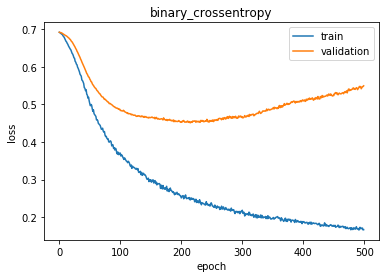

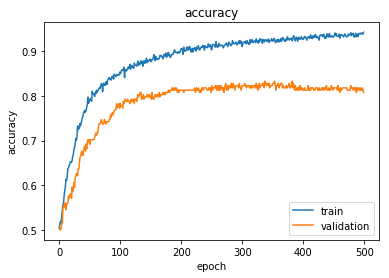

In [3]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'], loc='upper right')
plt.title('binary_crossentropy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','validation'], loc='lower right')
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [4]:
y_hat=model.predict(X_train)
y_hat=y_hat>0.5
confusion_matrix=sklearn.metrics.confusion_matrix(Y_train, y_hat)

In [5]:
confusion_matrix

array([[931,  69],
       [ 72, 928]])

(array([1003.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         997.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

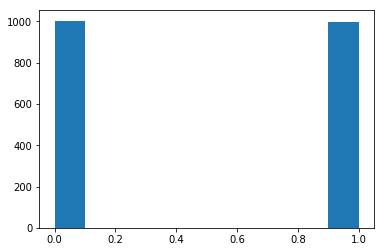

In [6]:
plt.hist(y_hat)

In [7]:
dataset=csv.reader(open('test.csv','r'))
X_test= np.zeros((400,14))
j=0
for data in dataset:
   if j>=1: 
    temp= data[1]
    #print (temp)
    i=0
    for element in temp:
        #print (element)
        if element=='A':
            X_test[j-1][i]=-1
            i=i+1
        if element=='C':
            X_test[j-1][i]=-0.5
            i=i+1
        if element=='G':
            X_test[j-1][i]=0.5
            i=i+1
        if element=='T':
            X_test[j-1][i]=1
            i=i+1
   j=j+1  

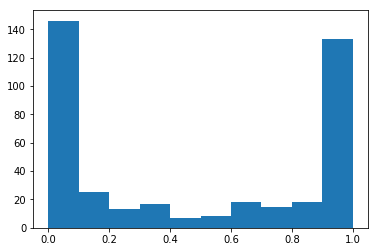

In [8]:
y_predict=model.predict(X_test)
y_predict=y_predict[:,0]
plt.hist(y_predict)
index=np.arange(len(y_predict))

In [9]:
y_predict.shape

(400,)

In [10]:
import pandas as pd
dataframe = pd.DataFrame({'id':index,'prediction':y_predict})
dataframe.to_csv("output_fcnn.csv",index=False,sep=',')